# Step 1: Import Necessary Libraries

In [75]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import data_preprocessing_emlakjet as dpe
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.sparse import hstack
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from transformers import pipeline



In [76]:
# Ensure NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mhsendur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mhsendur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Step 2: Load and Prepare the Data

## Load the JSON data

In [77]:

# Load the raw data
raw_data = dpe.load_json_data('istanbul_emlakjet_all_records_updated.json')

# Preprocess the data
processed_data = dpe.cleanse_and_preprocess_data(raw_data)

df = pd.DataFrame(processed_data)

# Display the first few rows of the DataFrame
df.head()


,id,categoryTypeName,tradeTypeName,estateTypeName,title,url,images,locationSummary,quickInfos,priceDetail,description,info,location
0,14869600,konut,satılık,yazlık,satılık 4+1 bahçe katı yazlık daire,https://imaj.emlakjet.com/ilan/satilik-41-bahc...,[https://imaj.emlakjet.com/listing/14869600/74...,adalar - kınalıada mahallesi,Oda Sayısı: 4+1; Bulunduğu Kat: Bahçe katı,"{'trendType': None, 'previousCurrency': None, ...",tekinay'da satılık 4+1 bahçe katı yazlık daire...,"{'id': '14869600', 'created_at': '2024-03-17',...","{'summary': 'Adalar - Kınalıada Mahallesi', 'c..."
1,14794365,konut,satılık,daire,büyükada i̇do i̇skelesine yakın konumda 3+1 bl...,https://imaj.emlakjet.com/ilan/buyukada-ido-is...,[https://imaj.emlakjet.com/listing/14794365/4E...,adalar - nizam mahallesi,Oda Sayısı: 3+1; Bulunduğu Kat: Düz Giriş (Zemin),"{'trendType': None, 'previousCurrency': None, ...",mega emlak'tan \n\nbüyükada yi̇rmi̇üç ni̇san c...,"{'id': '14794365', 'created_at': '2024-03-02',...","{'summary': 'Adalar - Nizam Mahallesi', 'city'..."
2,14780556,konut,satılık,daire,heybeliada muhteşem deniz manzaralı sahile yak...,https://imaj.emlakjet.com/ilan/heybeliada-muht...,[https://imaj.emlakjet.com/listing/14780556/1F...,adalar - heybeliada mahallesi,Oda Sayısı: 4+1; Bulunduğu Kat: 4. Kat,"{'trendType': None, 'previousCurrency': None, ...",heybeliada’da tamamen yenilenmiş deniz manzara...,"{'id': '14780556', 'created_at': '2024-02-28',...","{'summary': 'Adalar - Heybeliada Mahallesi', '..."
3,14780555,konut,satılık,daire,adalar heybeliada’da satılık 3+1 kat mülkiyetli,https://imaj.emlakjet.com/ilan/adalar-heybelia...,[https://imaj.emlakjet.com/listing/14780555/28...,adalar - heybeliada mahallesi,Oda Sayısı: 3+1; Bulunduğu Kat: 3. Kat,"{'trendType': None, 'previousCurrency': None, ...",heybeliada’da satılık 3+1kat mülkiyetli\n\nhey...,"{'id': '14780555', 'created_at': '2024-02-28',...","{'summary': 'Adalar - Heybeliada Mahallesi', '..."
4,14771773,konut,satılık,yalı,prenses adalari heybeli̇de muhteşem deni̇z yal...,https://imaj.emlakjet.com/ilan/prenses-adalari...,[https://imaj.emlakjet.com/listing/14771773/BD...,adalar - heybeliada mahallesi,Oda Sayısı: 9+ Oda,"{'trendType': None, 'previousCurrency': None, ...",-prenses adalari heybeli̇ adada\n\n250 m2 araz...,"{'id': '14771773', 'created_at': '2024-02-27',...","{'summary': 'Adalar - Heybeliada Mahallesi', '..."


## Data Preparation

In [78]:
print(df.columns)

Index(['id', 'categoryTypeName', 'tradeTypeName', 'estateTypeName', 'title',
       'url', 'images', 'locationSummary', 'quickInfos', 'priceDetail',
       'description', 'info', 'location'],
      dtype='object')


In [79]:
if 'priceDetail' in df.columns:
    price_details = pd.json_normalize(df['priceDetail'])
    df = pd.concat([df.drop(['priceDetail'], axis=1), price_details], axis=1)

if 'info' in df.columns:
    info_details = pd.json_normalize(df['info'])
    df = pd.concat([df.drop(['info'], axis=1), info_details], axis=1)


In [80]:
print(df.columns)

Index(['id', 'categoryTypeName', 'tradeTypeName', 'estateTypeName', 'title',
       'url', 'images', 'locationSummary', 'quickInfos', 'description',
       'location', 'trendType', 'previousCurrency', 'previousPrice',
       'previousValueValid', 'currency', 'price', 'tlPrice',
       'alternativeValue', 'firstPrice', 'differenceRate', 'squareMeterPrice',
       'opportunity', 'id', 'created_at', 'updated_at', 'category',
       'trade_type', 'net_square', 'gross_square', 'room_count', 'build_age',
       'floor_number', 'floor_count', 'heating_type', 'usability',
       'suitability_for_credit', 'suitability_for_investor', 'in_site',
       'build_status', 'build_type', 'deed_status', 'mortgage_status',
       'furniture_status', 'subscription_price', 'loan_price', 'trade',
       'bath_count', 'square_of_bath', 'balcony_condition', 'balcony_count',
       'balcony_type', 'square_of_balcony', 'square_of_room', 'wc_count',
       'square_of_wc', 'block_of_buildings', 'sheet', 'parcel_o

In [81]:
# Display the data types of each column
print(df.dtypes)


id                   int64
categoryTypeName    object
tradeTypeName       object
estateTypeName      object
title               object
                     ...  
parcel_of_land      object
show_unit_price     object
video_navigable     object
ground_survey       object
flat_per_floor      object
Length: 63, dtype: object


In [82]:
# Print out numerical features
numerical_features = df.select_dtypes(include='number').columns
print(numerical_features)


Index(['id', 'previousPrice', 'price', 'tlPrice', 'firstPrice',
       'differenceRate', 'squareMeterPrice', 'net_square', 'gross_square'],
      dtype='object')


## Removing duplicate columns

In [83]:
# Check for duplicate column names
duplicate_columns = df.columns[df.columns.duplicated()]
if len(duplicate_columns) > 0:
    print("Duplicate columns found:", duplicate_columns)


Duplicate columns found: Index(['id'], dtype='object')


In [84]:
# Drop the duplicate column
df.drop(columns=['id'], inplace=True)


In [85]:
duplicate_columns = df.columns[df.columns.duplicated()]
if len(duplicate_columns) > 0:
    print("Duplicate columns found:", duplicate_columns)

In [86]:
print(df.columns)

Index(['categoryTypeName', 'tradeTypeName', 'estateTypeName', 'title', 'url',
       'images', 'locationSummary', 'quickInfos', 'description', 'location',
       'trendType', 'previousCurrency', 'previousPrice', 'previousValueValid',
       'currency', 'price', 'tlPrice', 'alternativeValue', 'firstPrice',
       'differenceRate', 'squareMeterPrice', 'opportunity', 'created_at',
       'updated_at', 'category', 'trade_type', 'net_square', 'gross_square',
       'room_count', 'build_age', 'floor_number', 'floor_count',
       'heating_type', 'usability', 'suitability_for_credit',
       'suitability_for_investor', 'in_site', 'build_status', 'build_type',
       'deed_status', 'mortgage_status', 'furniture_status',
       'subscription_price', 'loan_price', 'trade', 'bath_count',
       'square_of_bath', 'balcony_condition', 'balcony_count', 'balcony_type',
       'square_of_balcony', 'square_of_room', 'wc_count', 'square_of_wc',
       'block_of_buildings', 'sheet', 'parcel_of_land', 'sh

## Flattening lists

In [87]:
# Flatten nested lists in DataFrame
def flatten_nested_lists(df):
    for col in df.columns:
        df[col] = df[col].apply(lambda x: x[0] if isinstance(x, list) else x)
    return df

df = flatten_nested_lists(df)

def flatten_nested_dicts(df):
    for col in df.columns:
        if df[col].apply(lambda x: isinstance(x, dict)).all():
            df[col] = df[col].apply(lambda x: list(x.values())[0])
    return df

df = flatten_nested_dicts(df)

# Define preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define which columns are numerical and categorical
numerical_features = df.select_dtypes(include='number').columns
categorical_features = df.select_dtypes(include='object').columns

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
processed_data = preprocessor.fit_transform(df)

# Convert the processed data back to a DataFrame
processed_df = pd.DataFrame(processed_data)


# Step 3: Further Data Cleaning, Preprocessing

In [88]:
# Filling missing values for numerical features with the mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.mean()))

# For categorical features, fill missing values with the mode (most common value)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode().iloc[0]))


In [89]:
# One-Hot Encoding for nominal categorical variables - estate types
df = pd.get_dummies(df, columns=['categoryTypeName', 'estateTypeName'], drop_first=True)


In [90]:
df['build_age'] = df['build_age'].apply(lambda x: int(re.findall('\d+', x)[0]) if pd.notnull(x) else x)


In [91]:
# Function to convert room_count like "4+1" into an integer by summing the parts
def convert_room_count_to_int(room_count):
    if pd.isnull(room_count):
        return None  # Handle missing values
    parts = room_count.split('+')
    try:
        # Convert each part to integer and sum them
        return sum(int(part) for part in parts)
    except ValueError:
        # Handle edge cases where conversion to integer might fail
        return None

df['room_count'] = df['room_count'].apply(convert_room_count_to_int)


In [92]:
df.columns

Index(['tradeTypeName', 'title', 'url', 'images', 'locationSummary',
       'quickInfos', 'description', 'location', 'trendType',
       'previousCurrency', 'previousPrice', 'previousValueValid', 'currency',
       'price', 'tlPrice', 'alternativeValue', 'firstPrice', 'differenceRate',
       'squareMeterPrice', 'opportunity', 'created_at', 'updated_at',
       'category', 'trade_type', 'net_square', 'gross_square', 'room_count',
       'build_age', 'floor_number', 'floor_count', 'heating_type', 'usability',
       'suitability_for_credit', 'suitability_for_investor', 'in_site',
       'build_status', 'build_type', 'deed_status', 'mortgage_status',
       'furniture_status', 'subscription_price', 'loan_price', 'trade',
       'bath_count', 'square_of_bath', 'balcony_condition', 'balcony_count',
       'balcony_type', 'square_of_balcony', 'square_of_room', 'wc_count',
       'square_of_wc', 'block_of_buildings', 'sheet', 'parcel_of_land',
       'show_unit_price', 'video_navigable', 'gr

In [93]:
# Function to extract number from strings for 'floor_number' and 'floor_count'
def extract_number_from_string(s):
    # If the string is 'ground floor' or similar, return 0
    if pd.isnull(s):
        return None
    if 'ground' in s.lower():
        return 0
    # Extract number from string
    nums = re.findall('\d+', s)
    return int(nums[0]) if nums else None

# Apply the function to the 'floor_number' and 'floor_count' columns
df['floor_number'] = df['floor_number'].apply(extract_number_from_string)
df['floor_count'] = df['floor_count'].apply(extract_number_from_string)

df['floor_count'] = df['floor_count'].fillna(df['floor_count'].median())


In [94]:
# Apply One-Hot Encoding to 'heating_type' and 'build_status'
df = pd.get_dummies(df, columns=['heating_type', 'build_status'], drop_first=False)



In [95]:
df.columns

Index(['tradeTypeName', 'title', 'url', 'images', 'locationSummary',
       'quickInfos', 'description', 'location', 'trendType',
       'previousCurrency', 'previousPrice', 'previousValueValid', 'currency',
       'price', 'tlPrice', 'alternativeValue', 'firstPrice', 'differenceRate',
       'squareMeterPrice', 'opportunity', 'created_at', 'updated_at',
       'category', 'trade_type', 'net_square', 'gross_square', 'room_count',
       'build_age', 'floor_number', 'floor_count', 'usability',
       'suitability_for_credit', 'suitability_for_investor', 'in_site',
       'build_type', 'deed_status', 'mortgage_status', 'furniture_status',
       'subscription_price', 'loan_price', 'trade', 'bath_count',
       'square_of_bath', 'balcony_condition', 'balcony_count', 'balcony_type',
       'square_of_balcony', 'square_of_room', 'wc_count', 'square_of_wc',
       'block_of_buildings', 'sheet', 'parcel_of_land', 'show_unit_price',
       'video_navigable', 'ground_survey', 'flat_per_floor',


In [96]:
# Print out numerical features
numerical_features = df.select_dtypes(include='number').columns
print(numerical_features)


Index(['previousPrice', 'price', 'tlPrice', 'firstPrice', 'differenceRate',
       'squareMeterPrice', 'net_square', 'gross_square', 'room_count',
       'build_age', 'floor_number', 'floor_count', 'estateTypeName_daire',
       'estateTypeName_dağ evi', 'estateTypeName_kooperatif',
       'estateTypeName_köy evi', 'estateTypeName_köşk',
       'estateTypeName_müstakil ev', 'estateTypeName_prefabrik',
       'estateTypeName_residence', 'estateTypeName_villa',
       'estateTypeName_yalı', 'estateTypeName_yalı dairesi',
       'estateTypeName_yazlık', 'estateTypeName_çiftlik evi',
       'heating_type_Doğalgaz Sobalı', 'heating_type_Elektrikli Radyatör',
       'heating_type_Fancoil Ünitesi', 'heating_type_Güneş Enerjisi',
       'heating_type_Isı Pompası', 'heating_type_Isıtma Yok',
       'heating_type_Jeotermal', 'heating_type_Kat Kaloriferi',
       'heating_type_Klimalı', 'heating_type_Kombi Doğalgaz',
       'heating_type_Kombi Fueloil', 'heating_type_Kombi Katı Yakıt',
       'he

## Exploratory Data Analysis (EDA) 

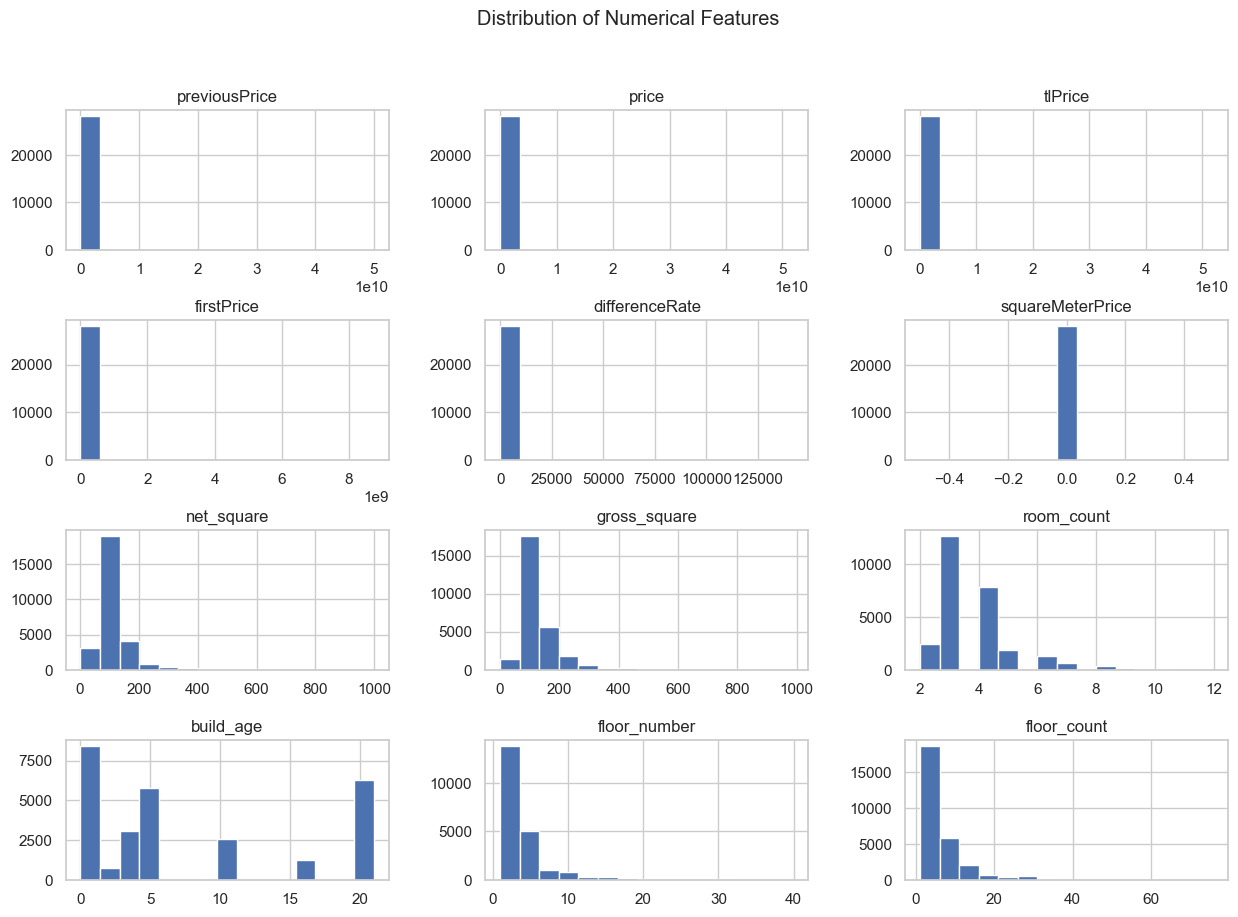

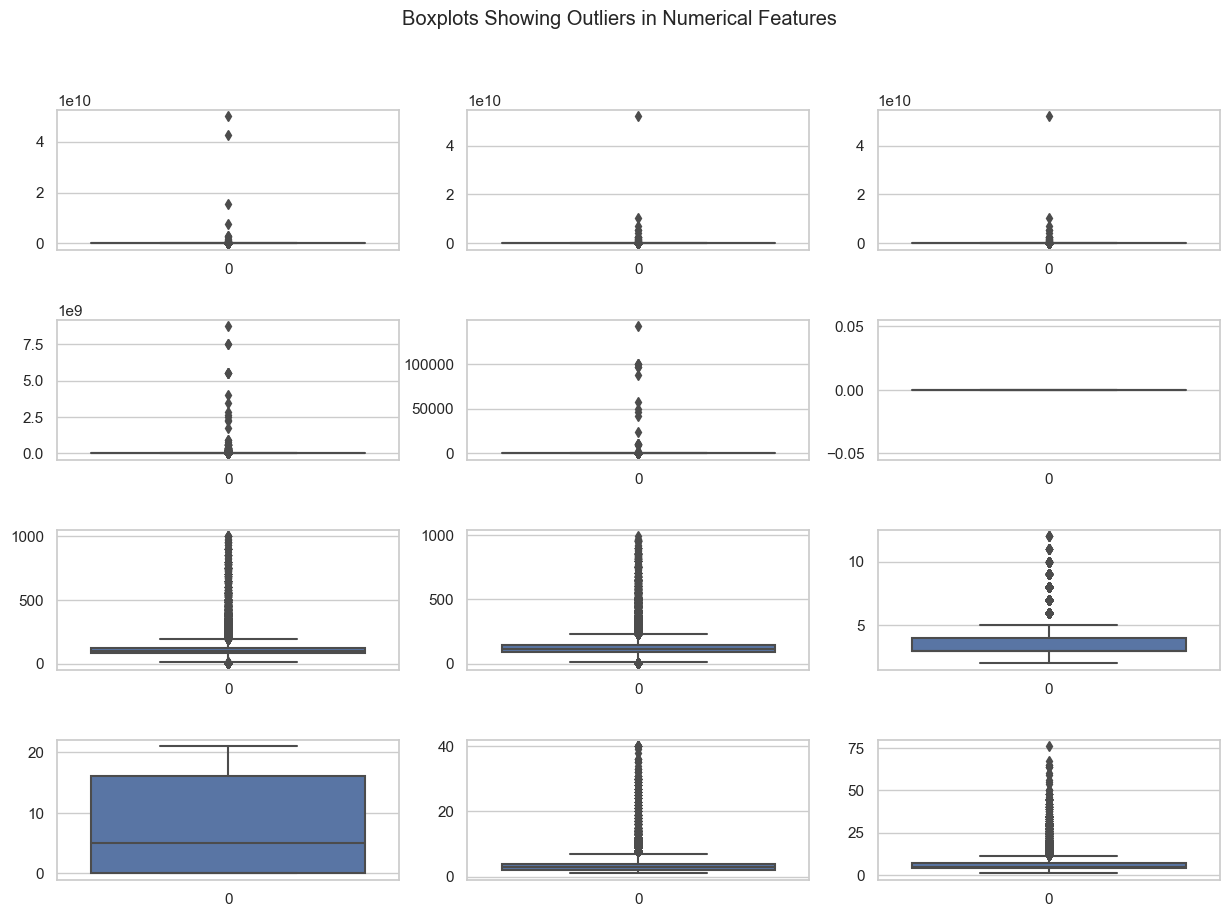

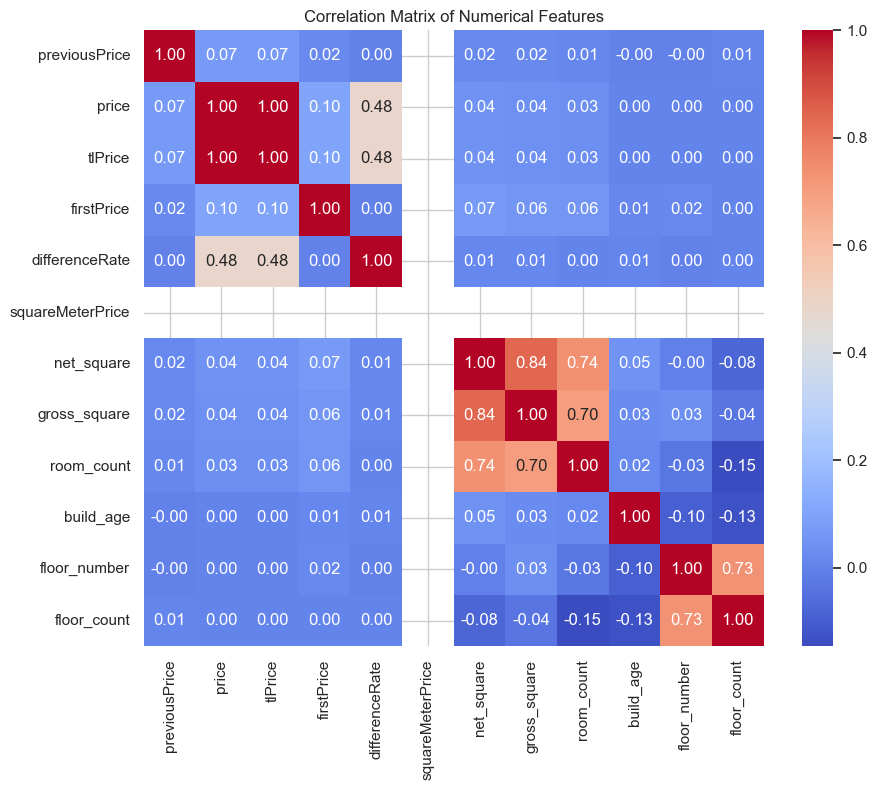

In [97]:
# Histograms for numerical features
numerical_features = ['previousPrice', 'price', 'tlPrice', 'firstPrice', 'differenceRate',
                    'squareMeterPrice', 'net_square', 'gross_square', 'room_count',
                    'build_age', 'floor_number', 'floor_count']

df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Boxplots for numerical features to spot outliers
fig, ax = plt.subplots(4, 3, figsize=(15, 10))
for var, subplot in zip(numerical_features, ax.flatten()):
    sns.boxplot(df[var], ax=subplot)
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Boxplots Showing Outliers in Numerical Features')
plt.show()

# Correlation matrix of numerical features
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

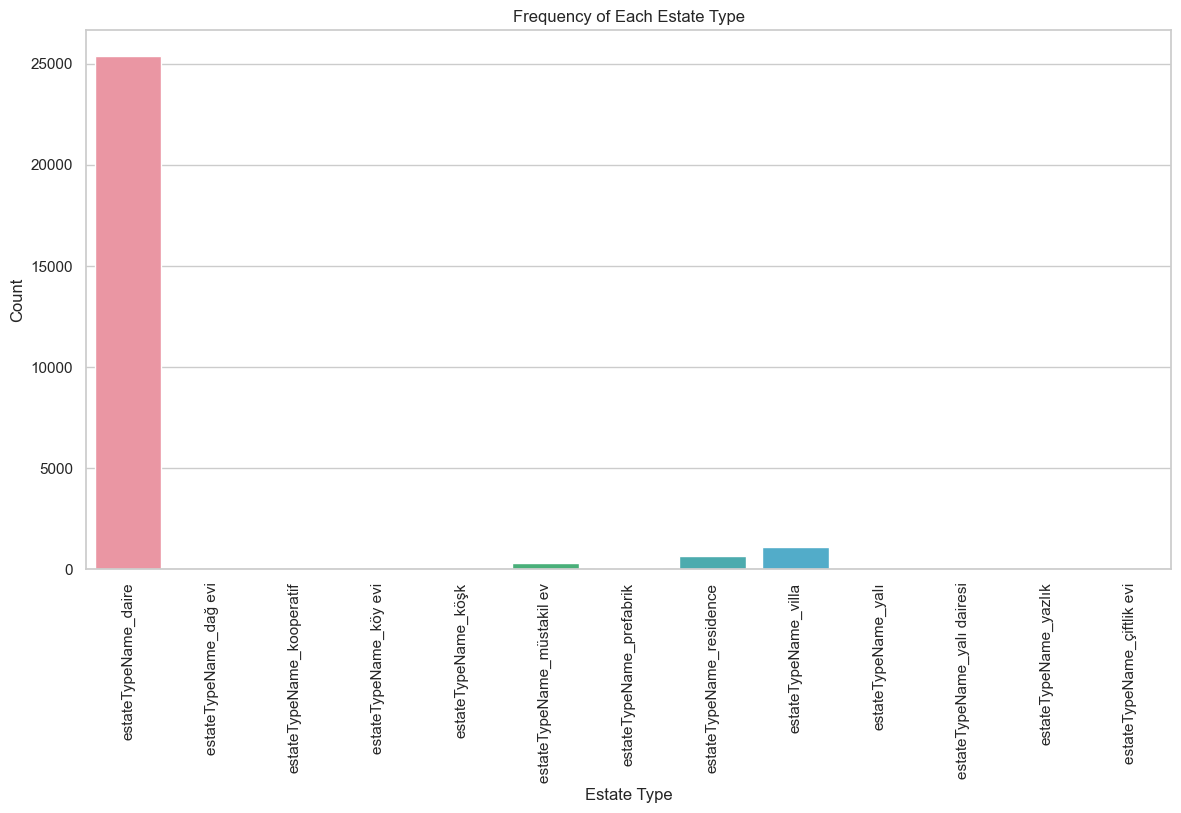

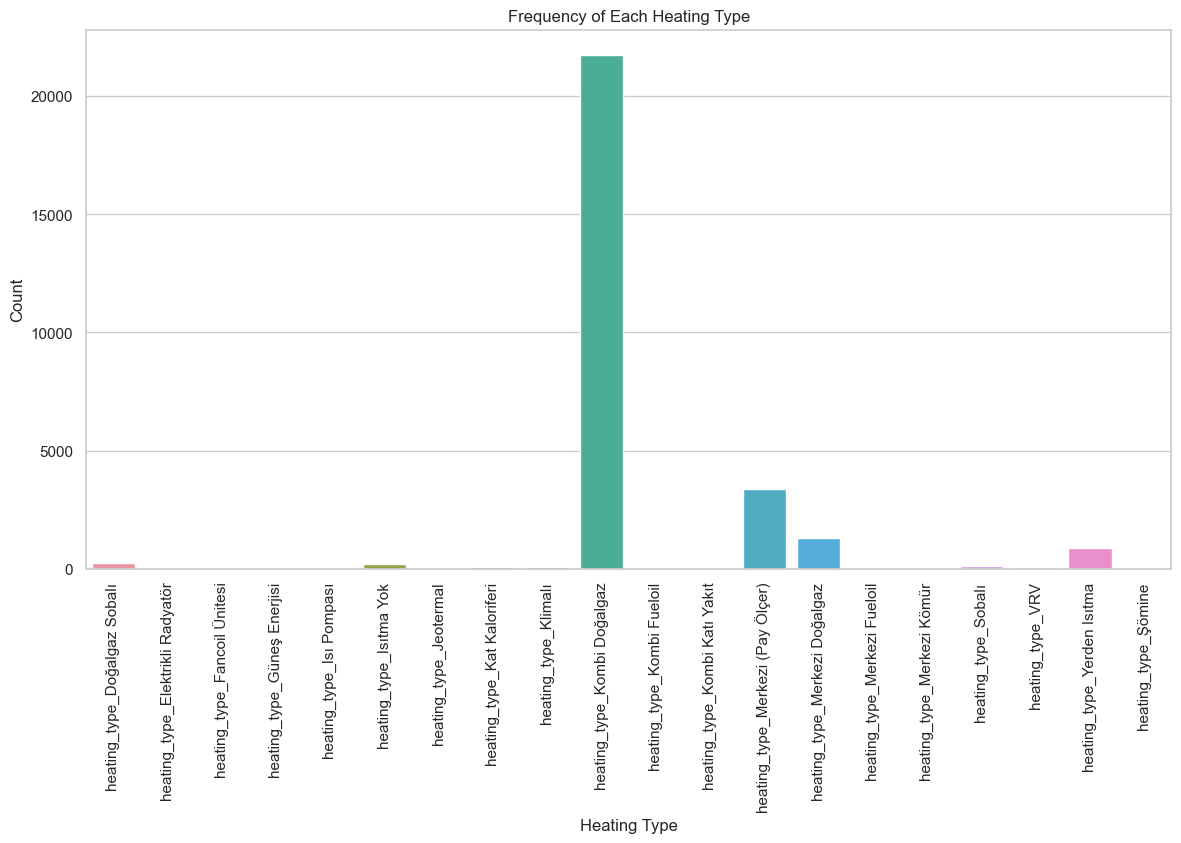

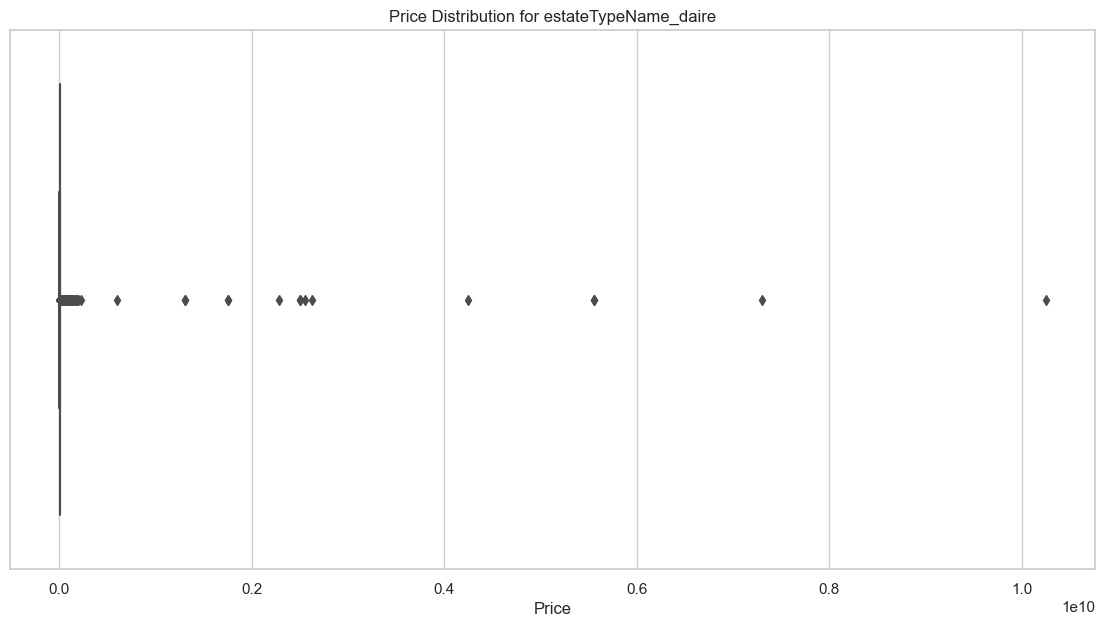

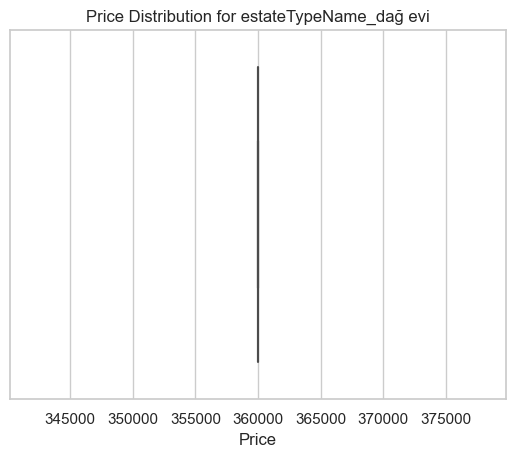

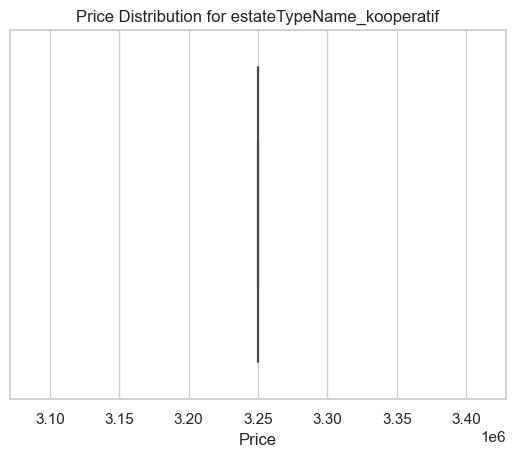

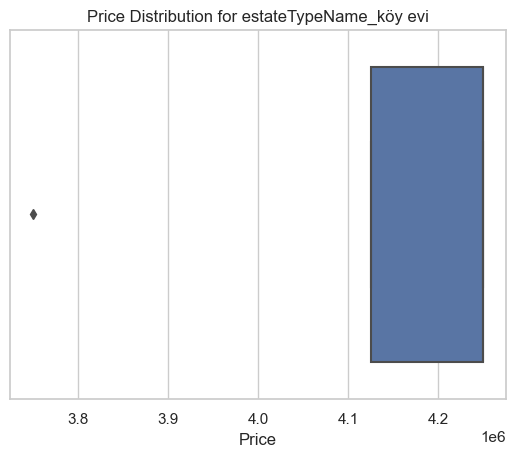

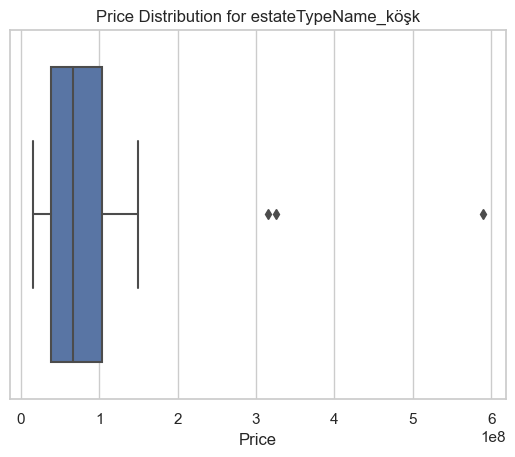

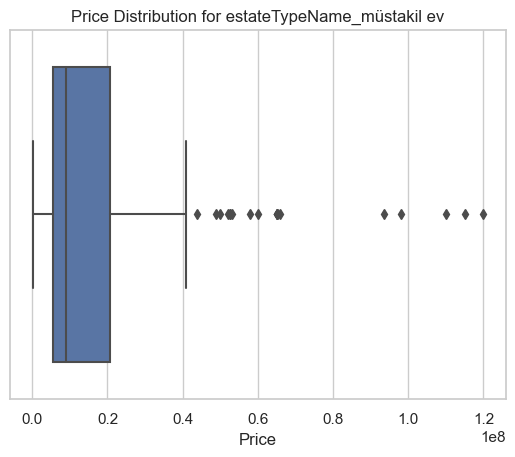

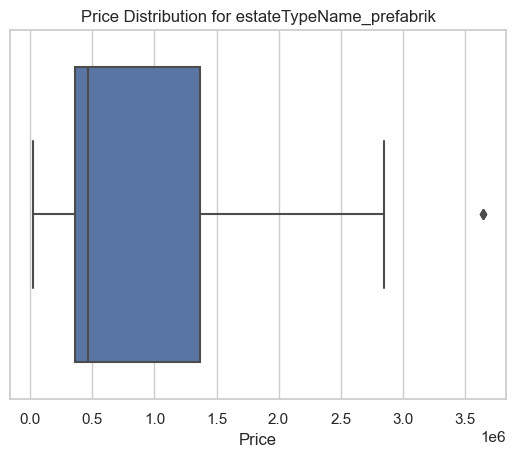

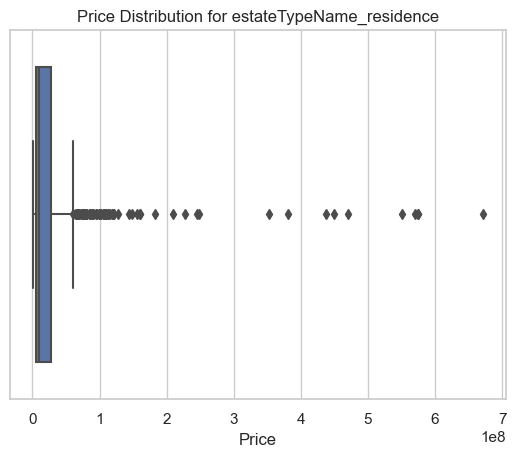

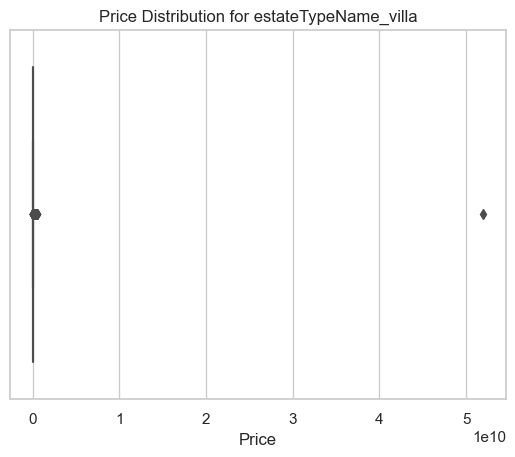

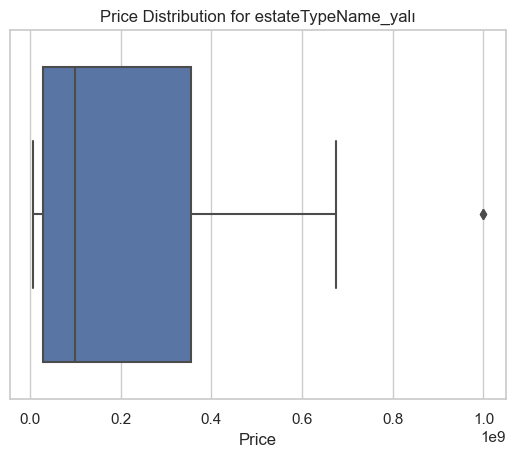

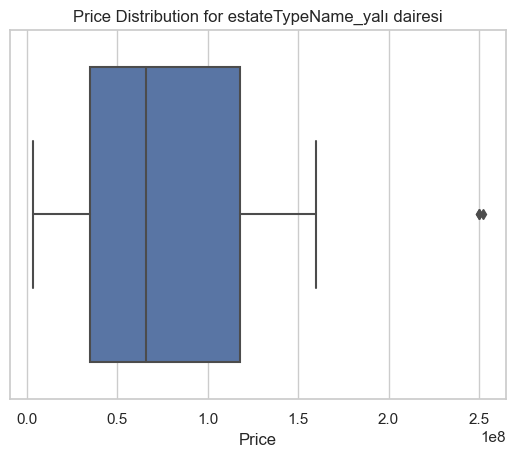

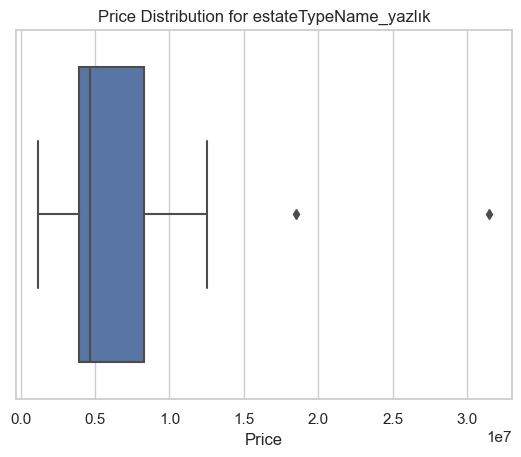

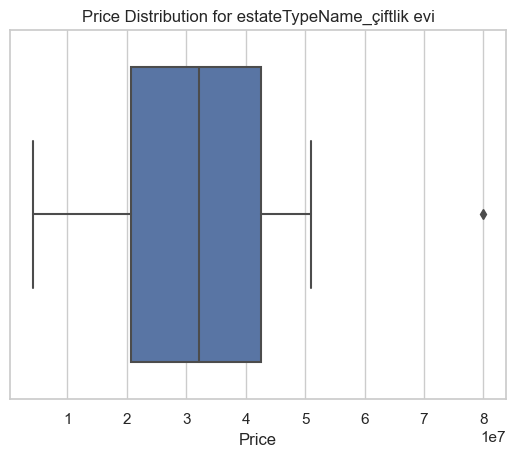

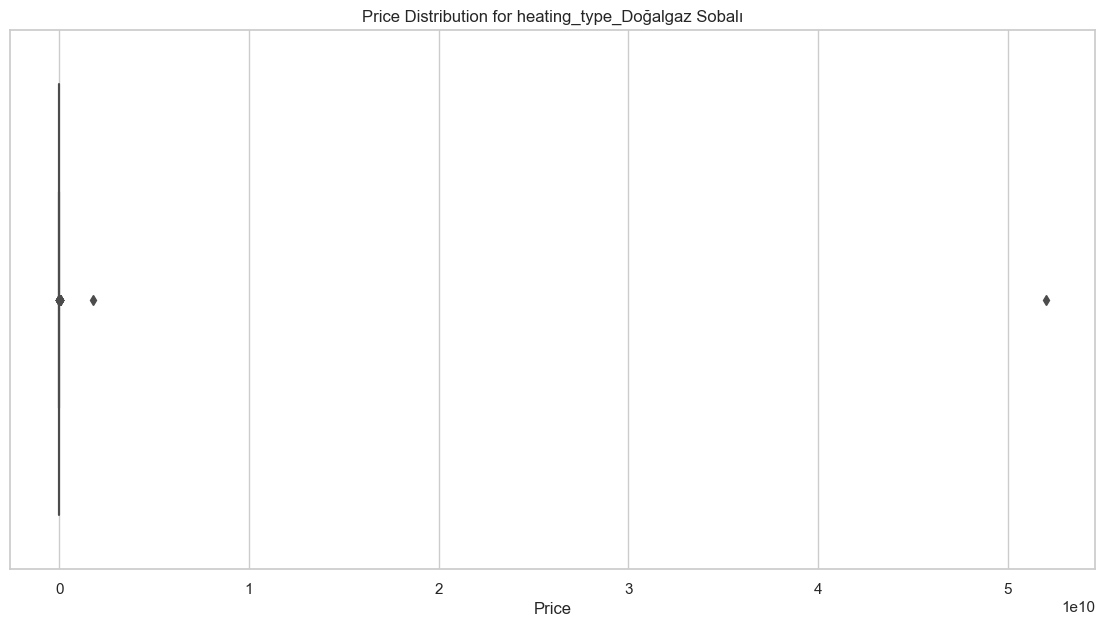

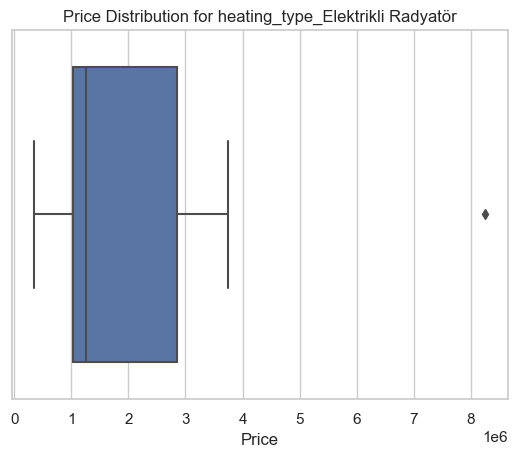

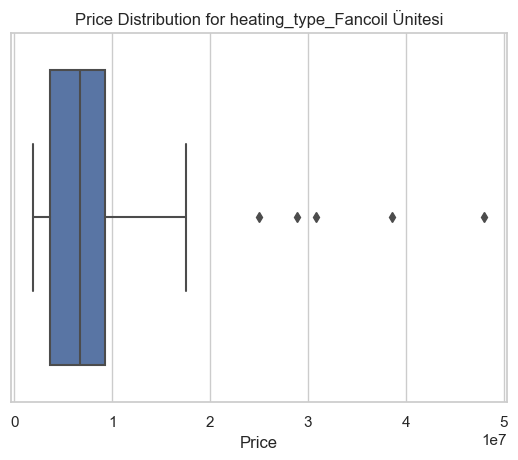

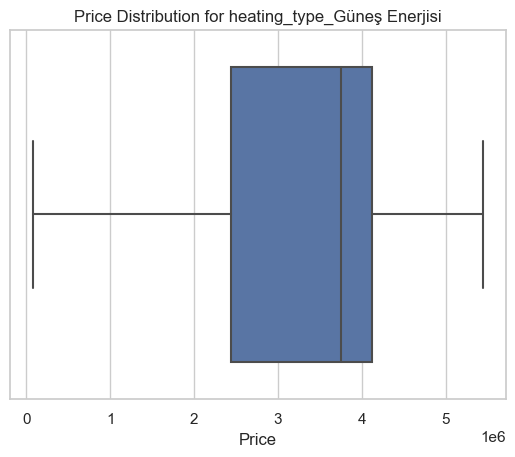

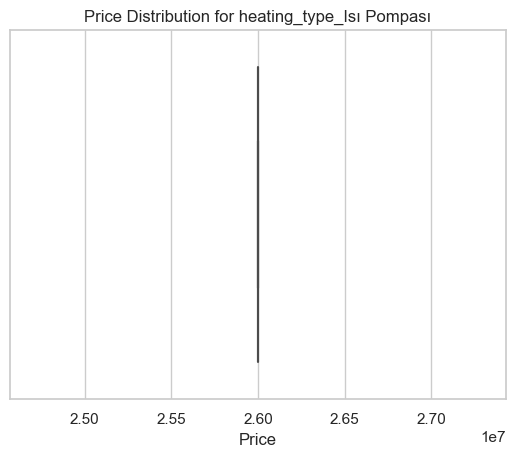

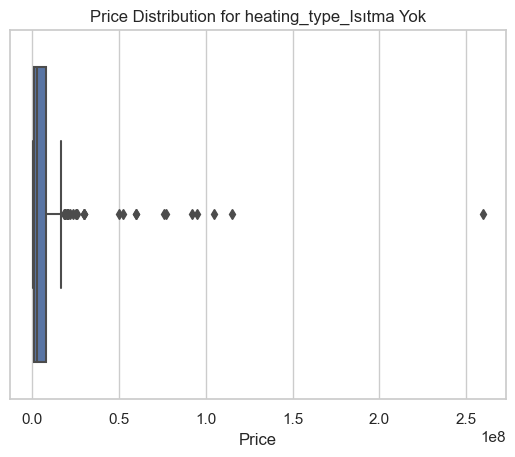

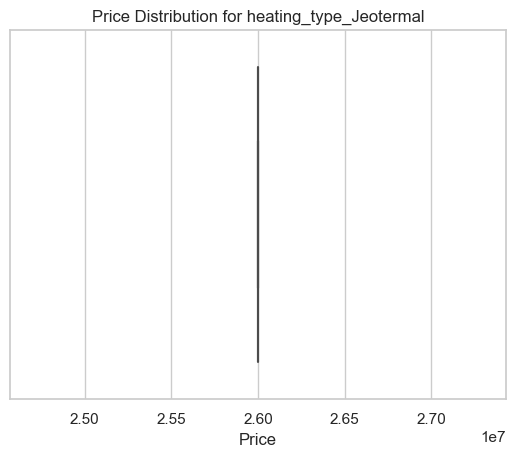

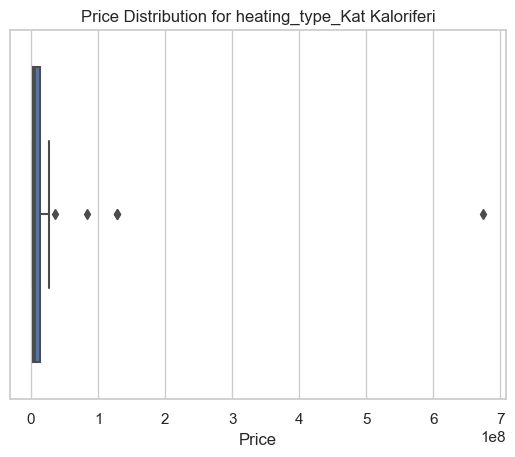

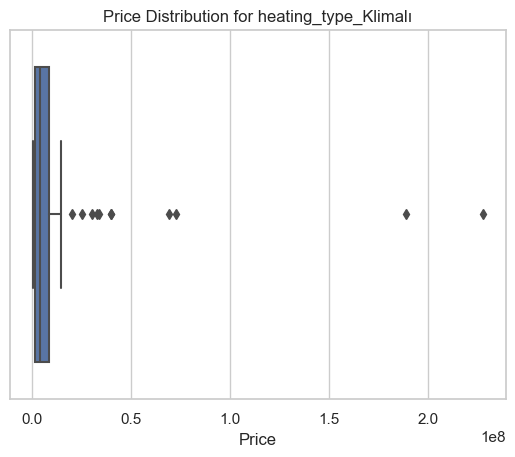

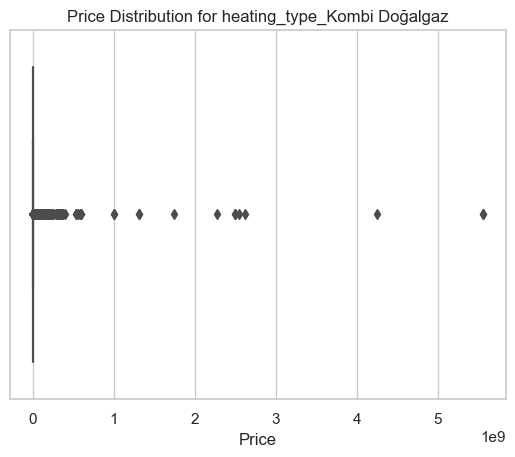

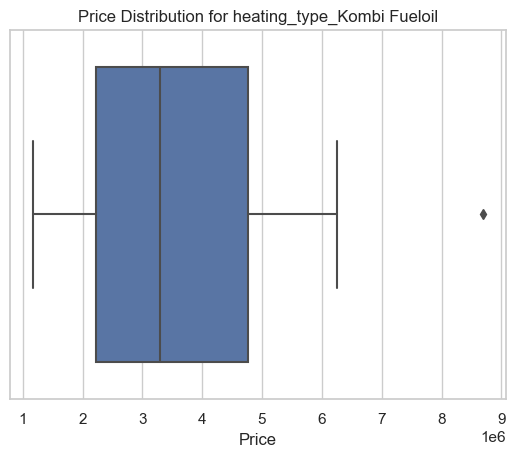

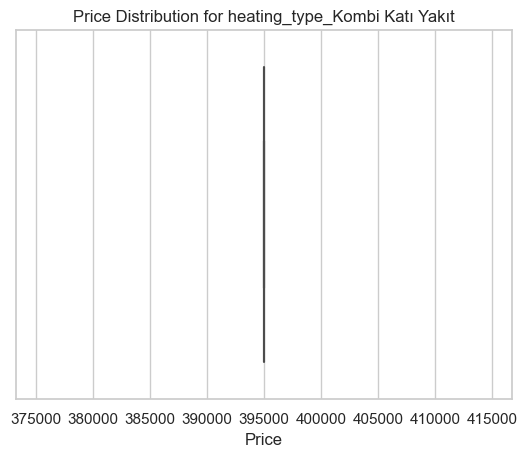

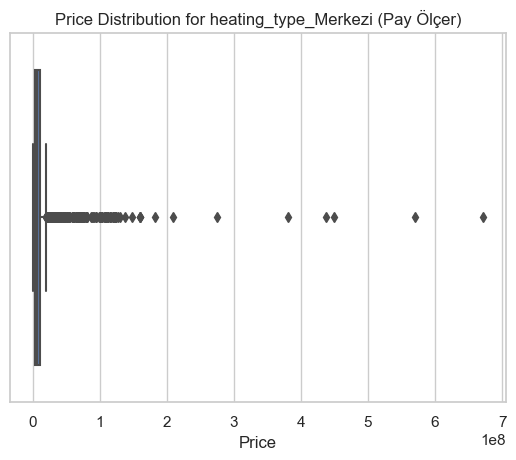

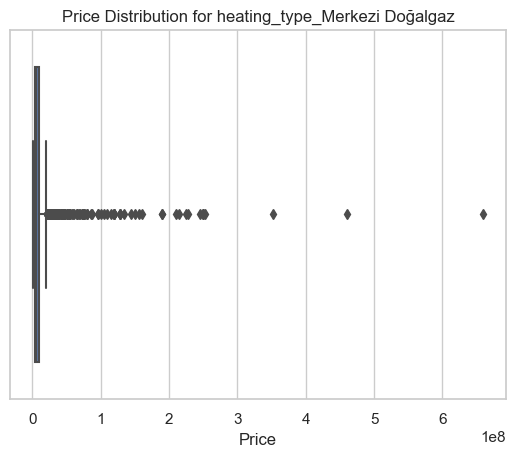

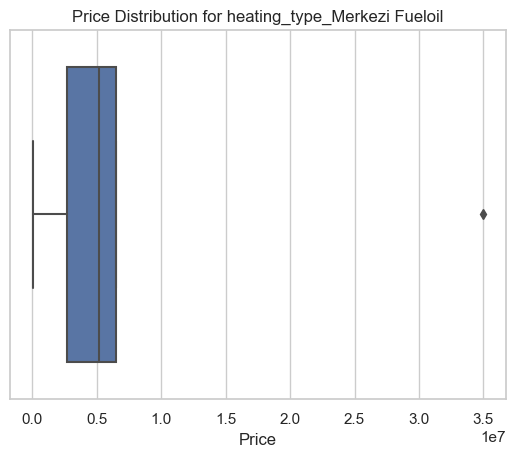

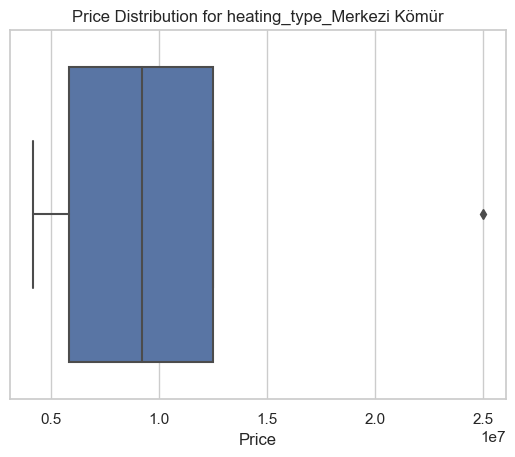

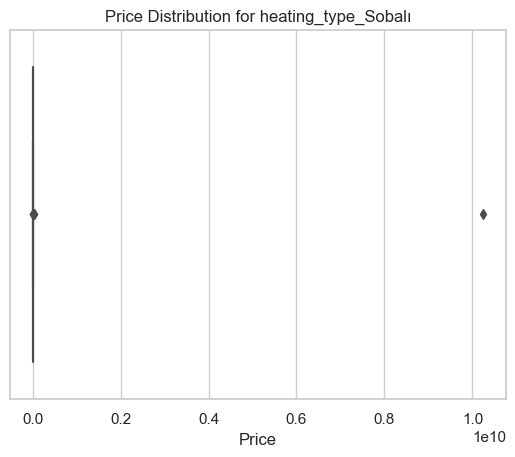

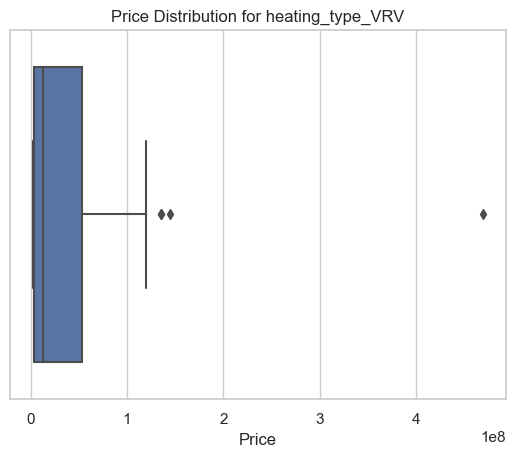

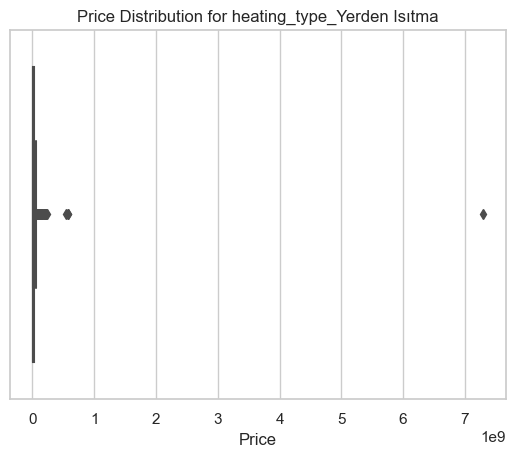

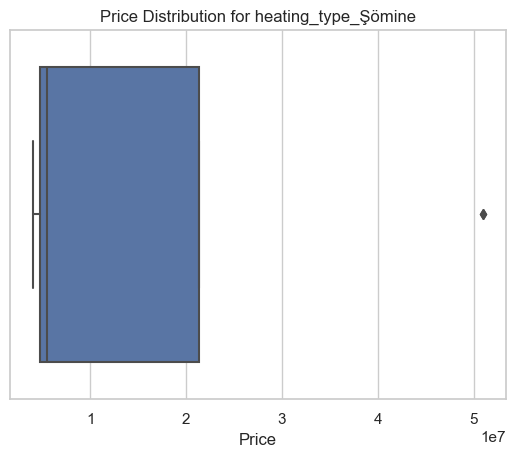

In [98]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Extracting columns for estate types and heating types
estate_type_columns = [col for col in df.columns if 'estateTypeName_' in col]
heating_type_columns = [col for col in df.columns if 'heating_type_' in col]

# Melt the DataFrame for estate types
estate_type_df = df.melt(value_vars=estate_type_columns)
estate_type_df = estate_type_df[estate_type_df['value'] == 1]

# Melt the DataFrame for heating types
heating_type_df = df.melt(value_vars=heating_type_columns)
heating_type_df = heating_type_df[heating_type_df['value'] == 1]

# Plotting bar charts for Estate Types
plt.figure(figsize=(14, 7))
sns.countplot(data=estate_type_df, x='variable')
plt.title('Frequency of Each Estate Type')
plt.xticks(rotation=90)
plt.xlabel('Estate Type')
plt.ylabel('Count')
plt.show()

# Plotting bar charts for Heating Types
plt.figure(figsize=(14, 7))
sns.countplot(data=heating_type_df, x='variable')
plt.title('Frequency of Each Heating Type')
plt.xticks(rotation=90)
plt.xlabel('Heating Type')
plt.ylabel('Count')
plt.show()

if 'price' in df.columns:
    plt.figure(figsize=(14, 7))
    for col in estate_type_columns:
        if df[col].sum() > 0:  
            sns.boxplot(data=df[df[col] == 1], x='price')
            plt.title(f'Price Distribution for {col}')
            plt.xlabel('Price')
            plt.show()

if 'price' in df.columns:
    plt.figure(figsize=(14, 7))
    for col in heating_type_columns:
        if df[col].sum() > 0:  
            sns.boxplot(data=df[df[col] == 1], x='price')
            plt.title(f'Price Distribution for {col}')
            plt.xlabel('Price')
            plt.show()


# Step 4: Feature Engineering

## NLTK description keyword analysis

In [99]:
df


,tradeTypeName,title,url,images,locationSummary,quickInfos,description,location,trendType,previousCurrency,...,heating_type_Merkezi Doğalgaz,heating_type_Merkezi Fueloil,heating_type_Merkezi Kömür,heating_type_Sobalı,heating_type_VRV,heating_type_Yerden Isıtma,heating_type_Şömine,build_status_Sıfır,build_status_Yapım Aşamasında,build_status_İkinci El
0,satılık,satılık 4+1 bahçe katı yazlık daire,https://imaj.emlakjet.com/ilan/satilik-41-bahc...,https://imaj.emlakjet.com/listing/14869600/744...,adalar - kınalıada mahallesi,Oda Sayısı: 4+1; Bulunduğu Kat: Bahçe katı,tekinay'da satılık 4+1 bahçe katı yazlık daire...,Adalar - Kınalıada Mahallesi,up,TL,...,0,0,0,0,0,0,0,0,0,1
1,satılık,büyükada i̇do i̇skelesine yakın konumda 3+1 bl...,https://imaj.emlakjet.com/ilan/buyukada-ido-is...,https://imaj.emlakjet.com/listing/14794365/4E1...,adalar - nizam mahallesi,Oda Sayısı: 3+1; Bulunduğu Kat: Düz Giriş (Zemin),mega emlak'tan \n\nbüyükada yi̇rmi̇üç ni̇san c...,Adalar - Nizam Mahallesi,up,TL,...,0,0,0,0,0,0,0,0,0,1
2,satılık,heybeliada muhteşem deniz manzaralı sahile yak...,https://imaj.emlakjet.com/ilan/heybeliada-muht...,https://imaj.emlakjet.com/listing/14780556/1F6...,adalar - heybeliada mahallesi,Oda Sayısı: 4+1; Bulunduğu Kat: 4. Kat,heybeliada’da tamamen yenilenmiş deniz manzara...,Adalar - Heybeliada Mahallesi,up,TL,...,0,0,0,0,0,0,0,0,0,1
3,satılık,adalar heybeliada’da satılık 3+1 kat mülkiyetli,https://imaj.emlakjet.com/ilan/adalar-heybelia...,https://imaj.emlakjet.com/listing/14780555/280...,adalar - heybeliada mahallesi,Oda Sayısı: 3+1; Bulunduğu Kat: 3. Kat,heybeliada’da satılık 3+1kat mülkiyetli\n\nhey...,Adalar - Heybeliada Mahallesi,up,TL,...,0,0,0,0,0,0,0,0,0,1
4,satılık,prenses adalari heybeli̇de muhteşem deni̇z yal...,https://imaj.emlakjet.com/ilan/prenses-adalari...,https://imaj.emlakjet.com/listing/14771773/BD2...,adalar - heybeliada mahallesi,Oda Sayısı: 9+ Oda,-prenses adalari heybeli̇ adada\n\n250 m2 araz...,Adalar - Heybeliada Mahallesi,up,TL,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28080,satılık,ön cephe özen i̇le yapilmiş full büyük 3+1 hep...,https://imaj.emlakjet.com/ilan/on-cephe-ozen-i...,https://imaj.emlakjet.com/listing/10528603/F7C...,zeytinburnu - seyitnizam mahallesi,Oda Sayısı: 3+1; Bulunduğu Kat: 10. Kat,&nbsp;\n\nreal i̇stanbul konutlarında en güzel...,Zeytinburnu - Seyitnizam Mahallesi,up,TL,...,0,0,0,0,0,0,0,0,0,1
28081,satılık,çiğdem emlaktan the istanbul evlerinde satilik...,https://imaj.emlakjet.com/ilan/cigdem-emlaktan...,https://imaj.emlakjet.com/listing/10527647/D71...,zeytinburnu - sümer mahallesi,Oda Sayısı: 4+1; Bulunduğu Kat: 1. Kat,&nbsp;\n\nçiğdem emlaktan&nbsp;\n\nthe istanbu...,Zeytinburnu - Sümer Mahallesi,up,TL,...,0,0,0,0,0,0,0,0,0,1
28082,satılık,ci̇ğdem emlak'tan yedi̇ mavi̇ si̇tesi̇nde sati...,https://imaj.emlakjet.com/ilan/cigdem-emlak-ta...,https://imaj.emlakjet.com/listing/10527373/66C...,zeytinburnu - kazlıçeşme mahallesi,Oda Sayısı: 3+1; Bulunduğu Kat: 14. Kat,&nbsp;\n\nçi̇ğdem emlak'tan&nbsp;\n\nyedi̇ mav...,Zeytinburnu - Kazlıçeşme Mahallesi,up,TL,...,0,0,0,0,0,1,0,0,0,1
28083,satılık,çi̇ğdem emlaktan yedi̇ mavi̇ si̇tesi̇ satilik ...,https://imaj.emlakjet.com/ilan/cigdem-emlaktan...,https://imaj.emlakjet.com/listing/10527226/66C...,zeytinburnu - kazlıçeşme mahallesi,Oda Sayısı: 3+1; Bulunduğu Kat: 14. Kat,&nbsp;\n\nçi̇ğdem emlak'tan&nbsp;\n\nyedi̇ mav...,Zeytinburnu - Kazlıçeşme Mahallesi,up,TL,...,0,0,0,0,0,1,0,1,0,0


In [100]:
# Adding a few more features
## Description Length
df['description_length'] = df['description'].apply(len)

## Unique Amenities in Description
amenities = ['havuzlu', 'balkon', 'teras', 'asansörlü', 'güvenlik', 'eşyalı']
for amenity in amenities:
    df[f'amenity_{amenity}'] = df['description'].apply(lambda x: 1 if amenity in x.lower() else 0)

## Province Score - to be done

## Listing age days
df['listing_age_days'] = (pd.to_datetime('today') - pd.to_datetime(df['created_at'])).dt.days
df['days_since_update'] = (pd.to_datetime('today') - pd.to_datetime(df['updated_at'])).dt.days

df['is_furnished'] = df['furniture_status'].apply(lambda x: 1 if x == 'Furnished' else 0)
df['is_mortgageable'] = df['mortgage_status'].apply(lambda x: 1 if x == 'Yes' else 0)

df['bath_count'] = pd.to_numeric(df['bath_count'], errors='coerce').fillna(0)
df['balcony_count'] = pd.to_numeric(df['balcony_count'], errors='coerce').fillna(0)

df['credit_suitable'] = df['suitability_for_credit'].apply(lambda x: 1 if x == 'Yes' else 0)
df['investment_suitable'] = df['suitability_for_investor'].apply(lambda x: 1 if x == 'Yes' else 0)

df['image_count'] = df['images'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

In [101]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import pandas as pd

# Ensure required resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Set up Turkish stopwords
turkish_stopwords = stopwords.words('turkish')

# Function to preprocess text: tokenize, remove non-alphabetic words, stopwords
def preprocess_text(text):
    # Tokenize by word
    tokens = word_tokenize(text, language='turkish')
    # Remove non-alphabetic words and stopwords
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in turkish_stopwords]
    return tokens

# Apply preprocessing to each document in the property description column
df['tokens'] = df['description'].fillna('').apply(preprocess_text)

# Flatten the list of tokens and compute frequency distribution
all_tokens = [token for sublist in df['tokens'] for token in sublist]
fdist = FreqDist(all_tokens)

# Get the 25 most common words
most_common_words = fdist.most_common(25)

# Display the most common words and their frequencies
print(most_common_words)


[nltk_data] Downloading package punkt to /Users/mhsendur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mhsendur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('nbsp', 302794), ('yürüme', 13576), ('kat', 9980), ('uygun', 9062), ('bir', 8108), ('yakin', 7307), ('olarak', 7071), ('dk', 7040), ('daire', 6837), ('olup', 6684), ('detayli', 6481), ('emlak', 6440), ('özel', 6439), ('satilik', 6376), ('mutfak', 5315), ('yaşam', 5217), ('banyo', 5167), ('kapali', 4864), ('ferah', 4863), ('randevu', 4781), ('olan', 4723), ('yüksek', 4709), ('profesyonel', 4684), ('yakın', 4643), ('metro', 4636)]


## Feature Selections, Sentiment Analysis

In [102]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch
from scipy.sparse import hstack
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Set up Turkish stopwords
nltk.download('stopwords')
turkish_stopwords = stopwords.words('turkish')

# Load the sentiment analysis model
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, framework='pt')

def preprocess_text(text):
    tokens = nltk.word_tokenize(text, language='turkish')
    tokens = [word for word in tokens if word.isalpha() and word.lower() not in turkish_stopwords]
    return ' '.join(tokens)

def batch_sentiment_analysis(texts, batch_size=64):  # Increased batch size
    # Process texts in batches
    results = []
    for i in range(0, len(texts), batch_size):
        print(f"Processing batch {i//batch_size + 1}/{len(texts)//batch_size + 1}")  # Log current batch
        batch_texts = texts[i:i + batch_size]
        batch_encoded = tokenizer(batch_texts, padding=True, truncation=True, max_length=512, return_tensors="pt")
        with torch.no_grad():
            outputs = model(**batch_encoded)
        predictions = torch.argmax(outputs.logits, dim=1)
        # Convert labels to numeric: 0 for 'negative', 1 for 'positive', 2 for 'neutral'
        results.extend(predictions.numpy())
    return results


def extract_features(df):
    # Preprocess descriptions
    df['description_preprocessed'] = df['description'].fillna('').apply(preprocess_text)
    # Perform sentiment analysis in batches
    df['description_sentiment'] = batch_sentiment_analysis(df['description_preprocessed'].tolist())
    # Add keyword features
    keywords = ['kelepir', 'acil', 'yürüme', 'yakin', 'dk', 'uygun', 'metro', 'ferah']
    for keyword in keywords:
        df[f'keyword_{keyword}'] = df['description_preprocessed'].apply(lambda x: 1 if keyword in x.lower() else 0)
    return df

# Apply the feature extraction
df = extract_features(df)

# Initialize and apply TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description_preprocessed'])


# Define the features excluding text, which will be replaced by TF-IDF features

features =   [ 'bath_count', 'balcony_count', 'credit_suitable', 'investment_suitable', 'image_count'
            'description_length', 'listing_age_days', 'days_since_update', 'is_furnished', 'is_mortgageable'
            'amenity_havuzlu', 'amenity_balkon', 'amenity_teras', 'amenity_asansörlü', 'amenity_güvenlik', 'amenity_eşyalı',
            'firstPrice', 'previousPrice', 'squareMeterPrice', 'net_square', 'gross_square', 'room_count',
            'build_age', 'floor_number', 'floor_count', 'differenceRate'
            'estateTypeName_daire', 'estateTypeName_dağ evi', 'estateTypeName_kooperatif',
            'estateTypeName_köy evi', 'estateTypeName_köşk',
            'estateTypeName_müstakil ev', 'estateTypeName_prefabrik',
            'estateTypeName_residence', 'estateTypeName_villa',
            'estateTypeName_yalı', 'estateTypeName_yalı dairesi',
            'estateTypeName_yazlık', 'estateTypeName_çiftlik evi',
            'heating_type_Doğalgaz Sobalı', 'heating_type_Elektrikli Radyatör',
            'heating_type_Fancoil Ünitesi', 'heating_type_Güneş Enerjisi',
            'heating_type_Isı Pompası', 'heating_type_Isıtma Yok',
            'heating_type_Jeotermal', 'heating_type_Kat Kaloriferi',
            'heating_type_Klimalı', 'heating_type_Kombi Doğalgaz',
            'heating_type_Kombi Fueloil', 'heating_type_Kombi Katı Yakıt',
            'heating_type_Merkezi (Pay Ölçer)', 'heating_type_Merkezi Doğalgaz',
            'heating_type_Merkezi Fueloil', 'heating_type_Merkezi Kömür',
            'heating_type_Sobalı', 'heating_type_VRV', 'heating_type_Yerden Isıtma',
            'heating_type_Şömine', 'build_status_Sıfır',
            'build_status_Yapım Aşamasında', 'build_status_İkinci El',
            'description_sentiment',
            'keyword_kelepir', 'keyword_acil', 'keyword_yürüme', 'keyword_yakin',
            'keyword_dk', 'keyword_uygun', 'keyword_metro', 'keyword_ferah' ]

filtered_features = [feature for feature in features if feature in df.columns]

# Extracting and scaling numerical/categorical features
X_numerical = df[filtered_features].fillna(df[filtered_features].median())
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Ensure dimensions are aligned before concatenation
X_numerical_scaled = X_numerical_scaled.toarray() if not isinstance(X_numerical_scaled, np.ndarray) else X_numerical_scaled
X = hstack([X_numerical_scaled, tfidf_matrix])

# Output dimensions to ensure alignment
print("Numerical features shape:", X_numerical_scaled.shape)
print("TF-IDF matrix shape:", tfidf_matrix.shape)
print("Combined features shape:", X.shape)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mhsendur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processing batch 1/439
Processing batch 2/439
Processing batch 3/439
Processing batch 4/439
Processing batch 5/439
Processing batch 6/439
Processing batch 7/439
Processing batch 8/439
Processing batch 9/439
Processing batch 10/439
Processing batch 11/439
Processing batch 12/439
Processing batch 13/439
Processing batch 14/439
Processing batch 15/439
Processing batch 16/439
Processing batch 17/439
Processing batch 18/439
Processing batch 19/439
Processing batch 20/439
Processing batch 21/439
Processing batch 22/439
Processing batch 23/439
Processing batch 24/439
Processing batch 25/439
Processing batch 26/439
Processing batch 27/439
Processing batch 28/439
Processing batch 29/439
Processing batch 30/439
Processing batch 31/439
Processing batch 32/439
Processing batch 33/439
Processing batch 34/439
Processing batch 35/439
Processing batch 36/439
Processing batch 37/439
Processing batch 38/439
Processing batch 39/439
Processing batch 40/439
Processing batch 41/439
Processing batch 42/439
P

# Step 5: Training and Testing Data

In [103]:

# Calculating IQR for 'price' to filter outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out the outliers based on IQR
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Apply preprocessing and TF-IDF transformation on filtered data
df_filtered['description_preprocessed'] = df_filtered['description'].fillna('').apply(preprocess_text)
tfidf_matrix_filtered = tfidf_vectorizer.fit_transform(df_filtered['description_preprocessed'])

# Extracting numerical/categorical features from filtered DataFrame
X_numerical_filtered = df_filtered[filtered_features].fillna(df_filtered[filtered_features].median())
X_numerical_scaled_filtered = scaler.fit_transform(X_numerical_filtered)

# Concatenating TF-IDF features with numerical/categorical features for filtered data
X_filtered = hstack([X_numerical_scaled_filtered, tfidf_matrix_filtered])

# Updating the target variable to match filtered data
y_filtered = df_filtered['price']

# Splitting the filtered dataset into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Function to train and evaluate models
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Model: {model.__class__.__name__}')
    print(f'RMSE: {rmse}')
    print(f'R² score: {r2}')
    
    # Plotting Actual vs Predicted prices with error color scale
    errors = y_test - y_pred
    plt.figure(figsize=(12, 8))
    sc = plt.scatter(y_test, y_pred, alpha=0.7, c=errors)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Price with Error Color Scale')
    plt.colorbar(sc, label='Error (Actual - Predicted)')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.grid(True)
    plt.show()


/var/folders/_1/3qymn7m96cg7b7_0ptngms540000gp/T/ipykernel_6219/2363693388.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['description_preprocessed'] = df_filtered['description'].fillna('').apply(preprocess_text)


Training and evaluating model: LinearRegression
Model: LinearRegression
RMSE: 1607359.3863507605
R² score: 0.564450364890889


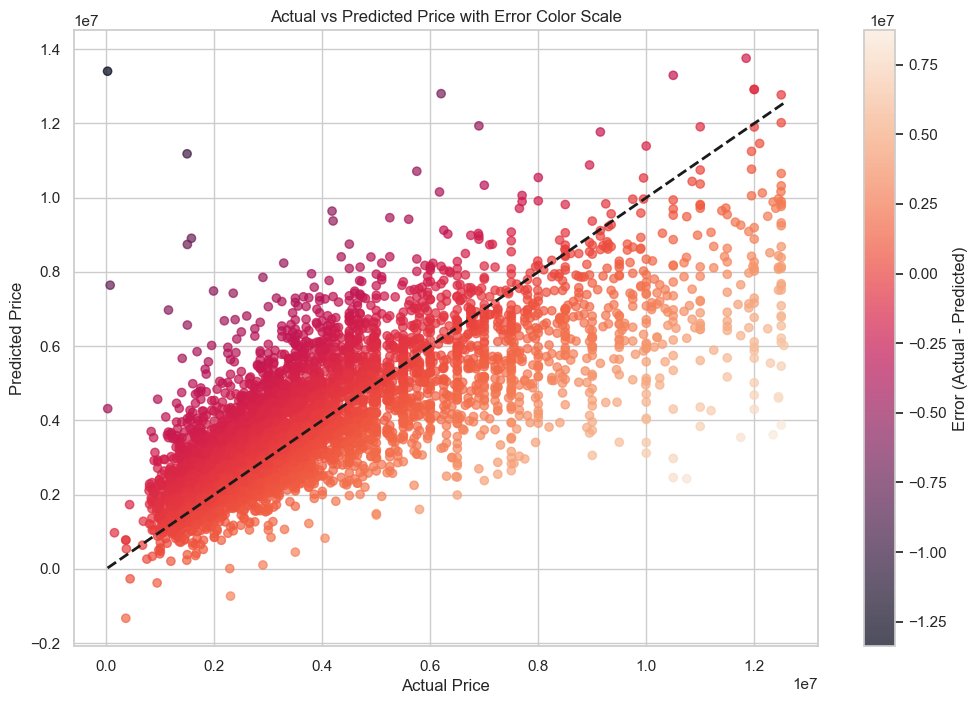

--------------------------------------------------------------------------------
Training and evaluating model: RandomForestRegressor
Model: RandomForestRegressor
RMSE: 386311.2021402013
R² score: 0.9748414112176988


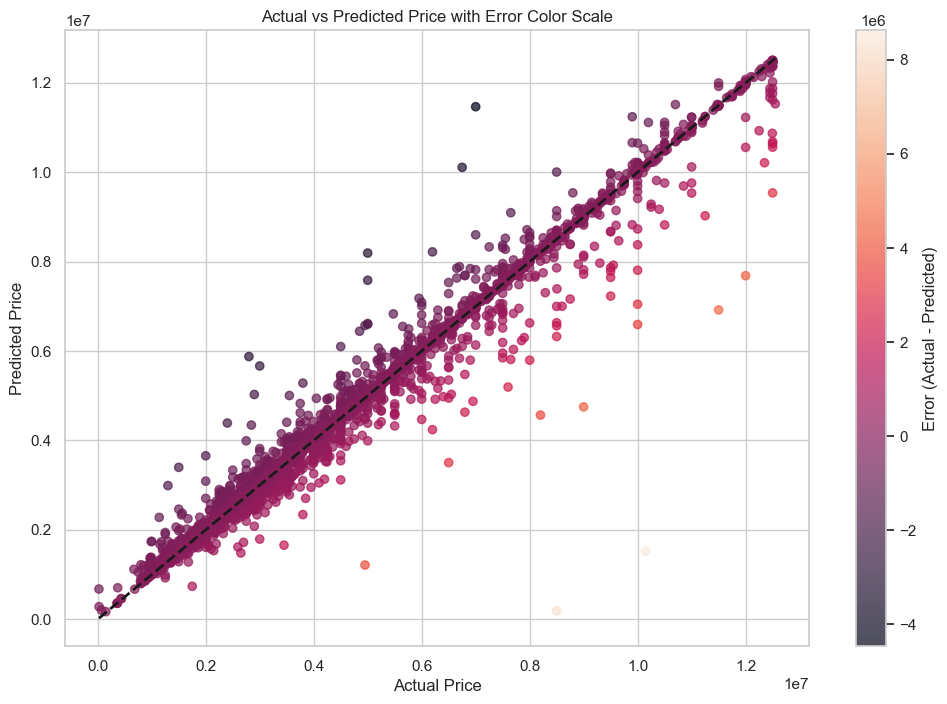

--------------------------------------------------------------------------------


In [104]:

# Defining the list of models you want to evaluate
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=42),
]

# Train and evaluate each model using the filtered and preprocessed dataset
for model in models:
    print(f"Training and evaluating model: {model.__class__.__name__}")
    train_evaluate_model(model, X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered)
    print("-" * 80)  # Print a separator line between model evaluations


In [105]:
# Convert X_filtered from sparse to dense if necessary for neural network models
X_dense = X_filtered.toarray() if hasattr(X_filtered, "toarray") else X_filtered

# Define y for clarity, assuming y_filtered is the correct target variable
y = y_filtered

def train_evaluate_model_cv(model, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    r2_scorer = make_scorer(r2_score)

    mse_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring=r2_scorer)

    rmse_scores = np.sqrt(np.abs(mse_scores))
    
    print(f'Model: {model.__class__.__name__}')
    print(f'Average RMSE: {np.mean(rmse_scores)}')
    print(f'Average R² score: {np.mean(r2_scores)}\n')

# Adjust X to be dense for all models if necessary, specifically for MLPRegressor
X_for_cv = X_dense

# List of models to evaluate
models = [
    LinearRegression(), 
    RandomForestRegressor(n_estimators=100, random_state=42), 
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
]

# Train and evaluate each model with cross-validation
for model in models:
    train_evaluate_model_cv(model, X_for_cv, y)

Model: LinearRegression
Average RMSE: 2.041077081300059e+19
Average R² score: -1.5064837973376351e+26

Model: RandomForestRegressor
Average RMSE: 420672.7325753171
Average R² score: 0.9703379826970877



KeyboardInterrupt: 

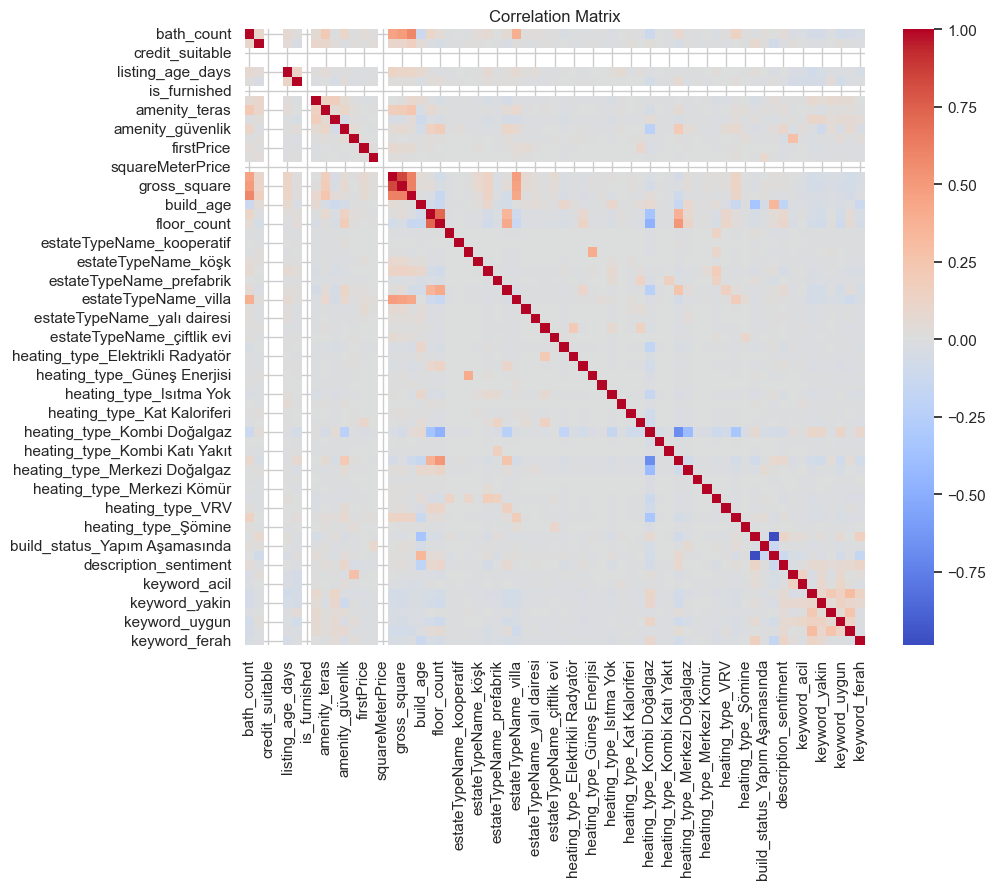

In [106]:
# Calculate correlation matrix
corr_matrix = X_numerical.corr()

# Plot heatmap without annotations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')  # cmap can be adjusted to your preference
plt.title("Correlation Matrix")
plt.show()
# test icin kullan